In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, precision_score, recall_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

### Loading the test data to perform evaluate models.

In [13]:
test_path = 'D:/semestr_10/master_thesis/medical_chatbot/notebooks/datasets_augmented/test'

In [14]:
test_aug = ImageDataGenerator(rescale=1./255)

In [15]:
test_gen = test_aug.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False 
)

Found 305 images belonging to 3 classes.


### Loading models for each NN:

In [16]:
radimagenet_model = load_model('D:/semestr_10/master_thesis/medical_chatbot/notebooks/models/radimagenet_best_model.h5')
efficientnet_model = load_model('D:/semestr_10/master_thesis/medical_chatbot/notebooks/models/efficientnet_best_model.h5')
chexnet_model = load_model('D:/semestr_10/master_thesis/medical_chatbot/notebooks/models/chexnet_best_model.h5')

### Evaluating model

In [17]:
def evaluate_classification_model(model, test_gen):
    """
    Evaluates a trained classification model on a test generator.
    
    Parameters:
        model      : Trained Keras model (.h5 or compiled Model object)
        test_gen   : Keras ImageDataGenerator with test data, shuffle=False required

    Prints:
        Accuracy, F1 Score, Precision, Recall, Confusion Matrix, Classification Report
    """
    
    # Step 1: Predict
    y_pred_probs = model.predict(test_gen, verbose=1)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_gen.classes
    class_labels = list(test_gen.class_indices.keys())

    # Step 2: Metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    print("\n📊 Evaluation Metrics:")
    print(f"✅ Accuracy       : {acc:.4f}")
    print(f"✅ F1 Score (macro): {f1:.4f}")
    print(f"✅ Precision (macro): {precision:.4f}")
    print(f"✅ Recall (macro)  : {recall:.4f}")

    # Step 3: Full report
    print("\n📄 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Step 4: Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('🧮 Confusion Matrix')
    plt.tight_layout()
    plt.show()

### Evaluation:

#### RadImageNet

d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step

📊 Evaluation Metrics:
✅ Accuracy       : 0.8656
✅ F1 Score (macro): 0.8667
✅ Precision (macro): 0.8696
✅ Recall (macro)  : 0.8659

📄 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.91      0.85      0.88       105
    Moderate       0.77      0.85      0.81       100
      Severe       0.93      0.90      0.91       100

    accuracy                           0.87       305
   macro avg       0.87      0.87      0.87       305
weighted avg       0.87      0.87      0.87       305



C:\Users\micha\AppData\Local\Temp\ipykernel_15580\3512825616.py:45: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


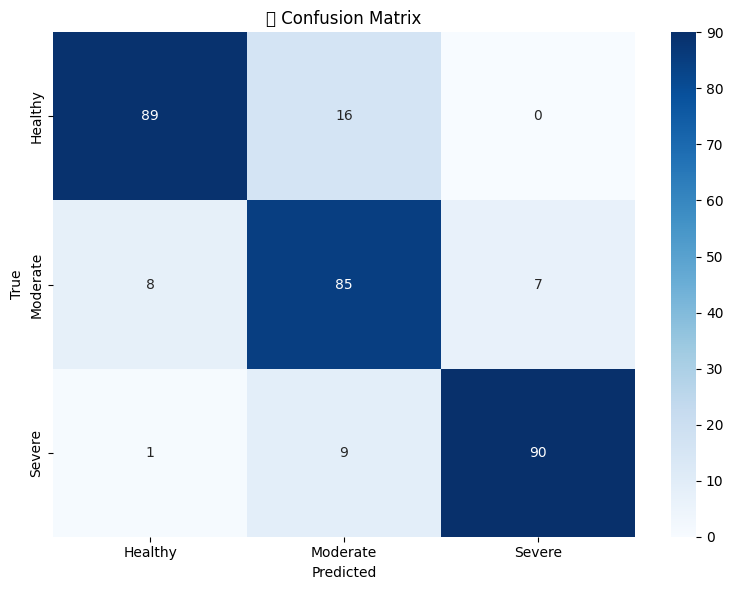

In [18]:
evaluate_classification_model(radimagenet_model, test_gen)

#### EfficientNet

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step

📊 Evaluation Metrics:
✅ Accuracy       : 0.3410
✅ F1 Score (macro): 0.2552
✅ Precision (macro): 0.2178
✅ Recall (macro)  : 0.3344

📄 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.36      0.73      0.49       105
    Moderate       0.29      0.27      0.28       100
      Severe       0.00      0.00      0.00       100

    accuracy                           0.34       305
   macro avg       0.22      0.33      0.26       305
weighted avg       0.22      0.34      0.26       305



d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

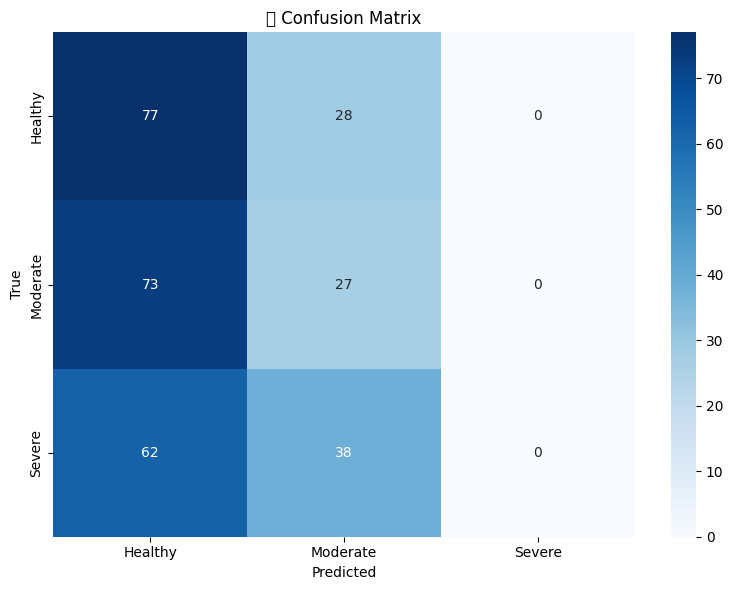

In [19]:
evaluate_classification_model(efficientnet_model, test_gen)

#### CheXNet

10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step

📊 Evaluation Metrics:
✅ Accuracy       : 0.6656
✅ F1 Score (macro): 0.6304
✅ Precision (macro): 0.6533
✅ Recall (macro)  : 0.6635

📄 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.67      0.79      0.73       105
    Moderate       0.61      0.28      0.38       100
      Severe       0.68      0.92      0.78       100

    accuracy                           0.67       305
   macro avg       0.65      0.66      0.63       305
weighted avg       0.65      0.67      0.63       305



C:\Users\micha\AppData\Local\Temp\ipykernel_15580\3512825616.py:45: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


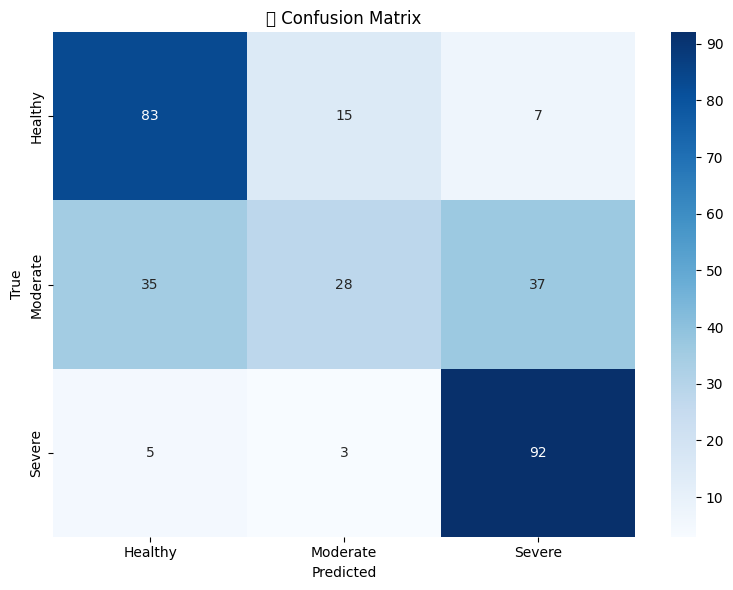

In [20]:
evaluate_classification_model(chexnet_model, test_gen)